<a href="https://www.kaggle.com/code/trugkin/final-project-ai-trantrungkien-19146346?scriptVersionId=98760357" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [5]:
#Import thư viện
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [6]:
#Load dataset
train = '../input/fer2013-5motions/MyDataset_fer2013/train'
val = '../input/fer2013-5motions/MyDataset_fer2013/test'

In [7]:
#xử lí data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 10,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')
val_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train,
        target_size=(48,48),
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val,
        target_size=(48,48),
        color_mode="grayscale",
        class_mode='categorical')

Found 24175 images belonging to 5 classes.
Found 6041 images belonging to 5 classes.


In [8]:
#Tạo layer model
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Dropout(0.3))

model.add(MaxPooling2D(pool_size=(2, 2))) #24

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #12
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #6
model.add(Dropout(0.3))

model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)      

In [9]:
#training model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-7),metrics=['accuracy'])
batch_size = 32
history = model.fit(
        train_generator,
        steps_per_epoch=24175 / batch_size,
        epochs=100,
        verbose = 1,
        validation_data=validation_generator,
        validation_steps=6041 / batch_size)

2022-06-19 09:36:20.112989: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-06-19 09:36:21.781688: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


755/755 [==============================] - 97s 118ms/step - loss: 1.5628 - accuracy: 0.2994 - val_loss: 1.5084 - val_accuracy: 0.3341
Epoch 2/100
755/755 [==============================] - 37s 49ms/step - loss: 1.3894 - accuracy: 0.4062 - val_loss: 1.2071 - val_accuracy: 0.5064
Epoch 3/100
755/755 [==============================] - 37s 49ms/step - loss: 1.2168 - accuracy: 0.4984 - val_loss: 1.1089 - val_accuracy: 0.5444
Epoch 4/100
755/755 [==============================] - 38s 50ms/step - loss: 1.0981 - accuracy: 0.5557 - val_loss: 0.9998 - val_accuracy: 0.5989
Epoch 5/100
755/755 [==============================] - 38s 50ms/step - loss: 1.0263 - accuracy: 0.5883 - val_loss: 0.9743 - val_accuracy: 0.5994
Epoch 6/100
755/755 [==============================] - 38s 50ms/step - loss: 0.9636 - accuracy: 0.6168 - val_loss: 0.8727 - val_accuracy: 0.6530
Epoch 7/100
755/755 [==============================] - 38s 50ms/step - loss: 0.9252 - accuracy: 0.6365 - val_loss: 0.8649 - val_accuracy: 0.6

In [10]:
#Lưu model
model_json = model.to_json()
with open("model_arch_v2.json", "w") as json_file:
    json_file.write(model_json)
model.save('my_model_v2.h5')

Sai số kiểm tra là:  0.9837091565132141
Độ chính xác kiểm tra là:  0.7477238774299622


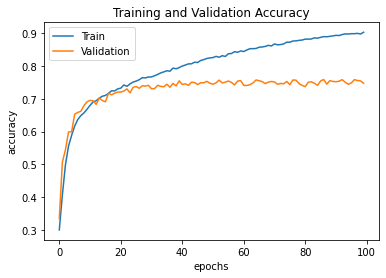

In [11]:
#đánh giá model
score = model.evaluate(validation_generator,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Train','Validation'])
plt.title('Training and Validation Accuracy')
plt.savefig('bestModelGraph.png')
plt.show()